Veriyi oku: pandas ile dosyayı içe aktar.

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Yapay Zeka Atölye/yapay_zeka_17072025/satislar.csv")
print(df.head())

   siparis_id       tarih    urun   kategori  adet  fiyat    sehir odeme_tipi
0           1  2024-01-01  Cetvel       Okul   1.0  28.79  Antalya     Havale
1           2  2024-01-02   Dosya  Kırtasiye   2.0  61.04  Antalya      Nakit
2           3  2024-01-03   Silgi       Ofis   NaN  97.99  Antalya     Havale
3           4  2024-01-04   Dosya  Kırtasiye   6.0  51.24    İzmir      Nakit
4           5  2024-01-05   Dosya       Okul   7.0  91.08    Bursa     Havale


İlk inceleme: head(), info(), describe() ile yapıyı tanı.

In [ ]:
print(df.describe())

       siparis_id       adet      fiyat
count  100.000000  95.000000  95.000000
mean    50.500000   4.694737  48.860947
std     29.011492   2.646048  27.684089
min      1.000000   1.000000   5.490000
25%     25.750000   2.500000  28.275000
50%     50.500000   4.000000  44.880000
75%     75.250000   7.000000  70.145000
max    100.000000   9.000000  99.480000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   siparis_id  100 non-null    int64  
 1   tarih       100 non-null    object 
 2   urun        100 non-null    object 
 3   kategori    100 non-null    object 
 4   adet        95 non-null     float64
 5   fiyat       95 non-null     float64
 6   sehir       100 non-null    object 
 7   odeme_tipi  100 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.4+ KB
None


Eksik değerleri tespit et: Hangi sütunlarda eksik var? Kaç adet?

In [ ]:
print(df.isnull().sum())

siparis_id    0
tarih         0
urun          0
kategori      0
adet          5
fiyat         5
sehir         0
odeme_tipi    0
dtype: int64


Eksik değerleri doldur: adet ve fiyat sütunlarını ortalama ile
doldur.


In [ ]:
adet_average = df["adet"].mean()
df["adet"] = df["adet"].fillna(adet_average)
print(df.isnull().sum())
print(df['adet'])

siparis_id    0
tarih         0
urun          0
kategori      0
adet          0
fiyat         5
sehir         0
odeme_tipi    0
dtype: int64
0     1.000000
1     2.000000
2     4.694737
3     6.000000
4     7.000000
        ...   
95    1.000000
96    1.000000
97    3.000000
98    6.000000
99    7.000000
Name: adet, Length: 100, dtype: float64


In [ ]:
price_average = df["fiyat"].mean()
print(price_average)
df["fiyat"] = df["fiyat"].fillna(price_average)
print(df.isnull().sum())
print(df["fiyat"])

48.86094736842105
siparis_id    0
tarih         0
urun          0
kategori      0
adet          0
fiyat         0
sehir         0
odeme_tipi    0
dtype: int64
0     28.79
1     61.04
2     97.99
3     51.24
4     91.08
      ...  
95    27.78
96    13.92
97    22.37
98    93.79
99    65.64
Name: fiyat, Length: 100, dtype: float64


Yeni sütun oluştur: toplam = adet * fiyat


In [ ]:
df["toplam"] = df["adet"] * df["fiyat"]
print(df["toplam"])

0      28.790000
1     122.080000
2     460.037263
3     307.440000
4     637.560000
         ...    
95     27.780000
96     13.920000
97     67.110000
98    562.740000
99    459.480000
Name: toplam, Length: 100, dtype: float64


Kategori bazlı analiz: groupby() ile toplam satışları hesapla, bar
grafik çiz.

<Axes: xlabel='kategori'>

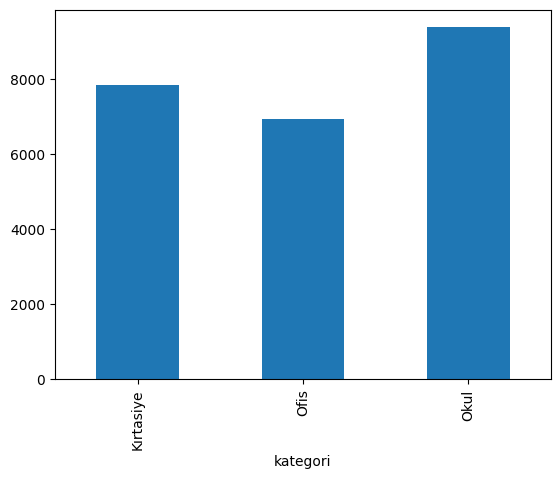

In [ ]:
df.groupby("kategori")["toplam"].sum().plot(kind="bar")

Günlük satış trendi: tarih sütununu dönüştür ve çizgi grafikle
göster.

<Axes: xlabel='tarih'>

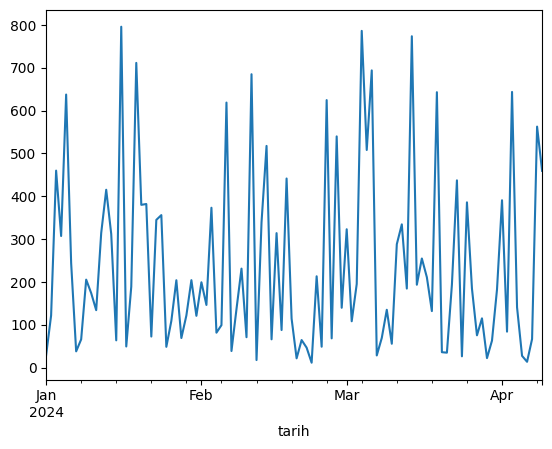

In [ ]:
df["tarih"] = pd.to_datetime(df["tarih"])
df.groupby("tarih")["toplam"].sum().plot(kind="line")


Şehir bazlı analiz: Hangi şehirde satış daha fazla? Bar grafikle sun

<Axes: xlabel='sehir'>

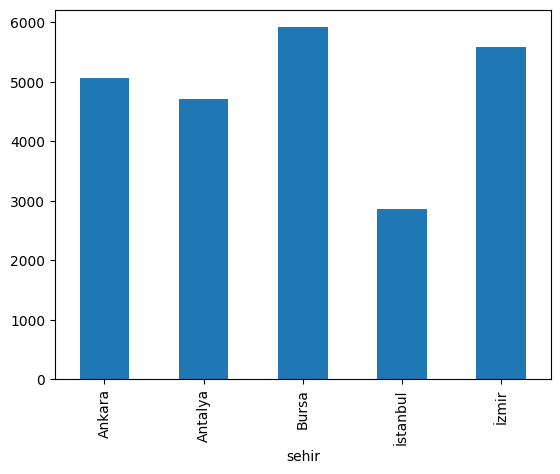

In [ ]:
df.groupby("sehir")["toplam"].sum().plot(kind="bar")


Ödeme tipi analizi: Hangi ödeme türü daha yaygın? countplot
çiz.
Dr.Öğr.Üyesi Furkan G

<Axes: xlabel='odeme_tipi'>

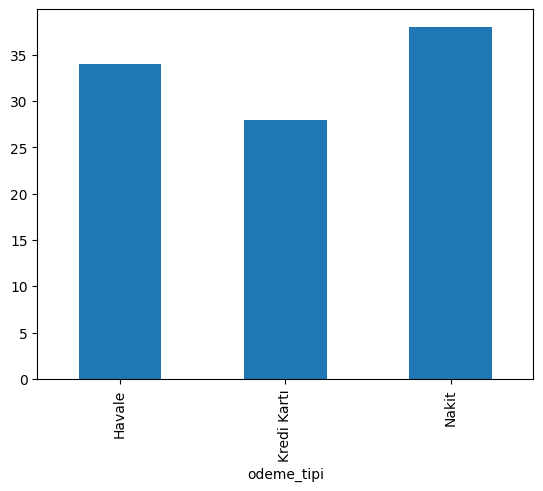

In [ ]:
df.groupby("odeme_tipi")["toplam"].count().plot(kind="bar")

In [3]:
df

,siparis_id,tarih,urun,kategori,adet,fiyat,sehir,odeme_tipi
0,1,2024-01-01,Cetvel,Okul,1.0,28.79,Antalya,Havale
1,2,2024-01-02,Dosya,Kırtasiye,2.0,61.04,Antalya,Nakit
2,3,2024-01-03,Silgi,Ofis,NaN,97.99,Antalya,Havale
3,4,2024-01-04,Dosya,Kırtasiye,6.0,51.24,İzmir,Nakit
4,5,2024-01-05,Dosya,Okul,7.0,91.08,Bursa,Havale
...,...,...,...,...,...,...,...,...
95,96,2024-04-05,Silgi,Kırtasiye,1.0,27.78,Ankara,Kredi Kartı
96,97,2024-04-06,Dosya,Kırtasiye,1.0,13.92,İstanbul,Kredi Kartı
97,98,2024-04-07,Defter,Kırtasiye,3.0,22.37,Antalya,Kredi Kartı
98,99,2024-04-08,Defter,Kırtasiye,6.0,93.79,Bursa,Nakit
